In [1]:
import numpy as np
import pandas as pd
import cv2
img1=cv2.imread('desert.jpg')
(row, col) = img1.shape[0:2]
for x in range(row):
    for y in range(col):
        id1=img1[x,y,0];
        id2=img1[x,y,1];
        id3=img1[x,y,2];
        if thresh[id1][id2][id3]>.15:
            img1[x,y,0]=255
            img1[x,y,1]=255
            img1[x,y,2]=255
        else:
            img1[x,y,0]=0
            img1[x,y,1]=0
            img1[x,y,2]=0


AttributeError: 'NoneType' object has no attribute 'shape'

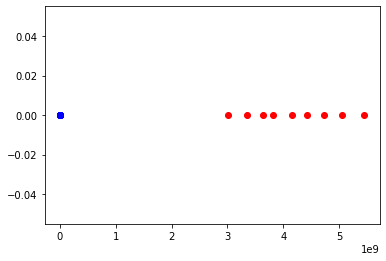

Snow
[(54905.30957020459, 'snow'), (57875.3967416207, 'snow'), (60253.14396776321, 'snow'), (61753.653163193514, 'snow'), (64483.05072652813, 'snow'), (66578.47578609771, 'snow'), (68736.67378481447, 'snow'), (70309.81479850448, 'desert'), (71080.80790902703, 'snow'), (72099.45445702069, 'desert'), (73316.46774770318, 'desert'), (73832.74023764796, 'snow'), (76835.91516992557, 'desert'), (78148.30173458665, 'desert'), (79217.38559811223, 'desert'), (79979.09870084809, 'desert'), (84212.61894158143, 'desert'), (92900.91497934776, 'desert')]


In [2]:
import numpy as np
import pandas as pd
import os
import cv2
import math
import matplotlib.pyplot as plt

def prec(img1,cls):
    a=np.array(img1)
    ax = a.reshape(-1, a.shape[-1])
    c=ax.flatten() 
    ret=np.append(c,cls);
    return ret;
    
directory1 = os.listdir('Desert')
directory2 = os.listdir('Snow')

r=len(directory1)

count=0;
a = []
b = []

min1=1434345663567

for itr in range(0,r-1):
    f1='Desert\\'+directory1[itr]
    f2='Snow\\'+directory2[itr]
#     print(f1);
#     print(f2);
    img1=cv2.imread(f1)
    img2=cv2.imread(f2)
    temp=prec(img1,"desert")
    min1=min(min1,temp.shape[0])
    a.append(temp)
    temp=prec(img2,"snow")
    min1=min(min1,temp.shape[0])
    b.append(temp)
#     cv2.imshow('image', img2);
#     cv2.imshow('image', img1);
#     cv2.waitKey(0)        
#     cv2.destroyAllWindows()
dis=[]
testImg=cv2.imread('test2.jpg')
x=prec(testImg,"no")
min1=min(min1,x.shape[0])
dis1=[]
dis2=[]
for itr in a:
    d=0
    for itr1 in range(min1-1):
        d=d+(int(itr[itr1])-int(x[itr1]))**2
    d=math.sqrt(d)
    dis1.append(d)
    tup=(d,"desert")
    dis.append(tup)
for itr in b:
    d=0
    for itr1 in range(min1-1):
        d=d+(int(itr[itr1])-int(x[itr1]))**2
    dis2.append(d)
    d=math.sqrt(d)
    tup=(d,"snow")
    dis.append(tup)
dis.sort()

dCount=0;
sCount=0;
for itr in range(5):
    if dis[itr][1]=="snow":
        sCount+=1
    elif dis[itr][1]=="desert":
        dCount+=1
fig, ax = plt.subplots()
zer=np.zeros(9)
ax.scatter(dis1,zer,color="blue")
ax.scatter(dis2,zer, color="red")
plt.show()
if(sCount>dCount):
    print("Snow")
else:
    print("Desert")
print(dis)
    
    
   

 
